In [79]:
import librosa, librosa.display
import matplotlib.pyplot as plt
import sklearn
import IPython.display as ipd
import numpy as np

In [83]:
def analyze_sound(path):
    sound, sr = librosa.load(path, sr=None)
    
    # Fourier transformation
    S = librosa.stft(sound)
    S_in_db = librosa.amplitude_to_db(np.abs(S), ref=np.max)
    
    librosa.display.specshow(S_in_db, sr=sr, x_axis='time', y_axis='log')
    plt.colorbar(format='%+2.0fdB')
    plt.show()
    
    # Ultrasonic sounds above > 20 kHz
    # The energyof the ultrasonic range has to exceed a threshold so it can be 
    freq_threshold = 20000
    energy_threshold = 0.01
    freqs = librosa.fft_frequencies(sr=sr)
    times = librosa.frames_to_time(np.arange(S.shape[1]), sr=sr)
    
    ultrasonic_mask = freqs > freq_threshold
    
    ultrasonic_energy = np.sum(np.abs(S[ultrasonic_mask, :])**2, axis=0)
    total_energy = np.sum(np.abs(S)**2, axis=0)
    energy_ratio = ultrasonic_energy / total_energy
    
    suspicious_frames = energy_ratio > energy_threshold
    
    if not np.any(suspicious_frames):
        print(f'No suspicious ultrasonic freq. detected in ${path}')
        return False, S, sr
    else:
        print(f'Suspicious ultrasonic freq. detected in ${path}')
        return True, S, sr

In [100]:
def shift_sound(S, sr):
    shifted_S = np.roll(S, -8000, axis=0)
    return librosa.istft(shifted_S)

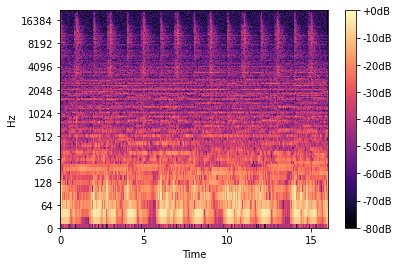

No suspicious ultrasonic freq. detected in $./Ex3_sound1.wav


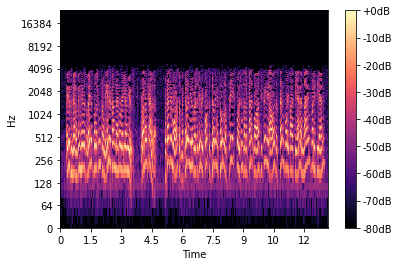

No suspicious ultrasonic freq. detected in $./Ex3_sound2.wav


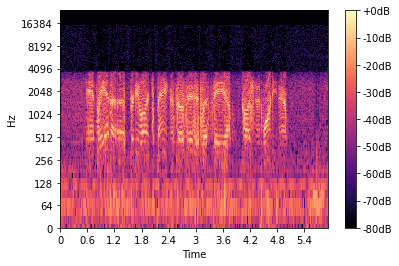

No suspicious ultrasonic freq. detected in $./Ex3_sound3.wav


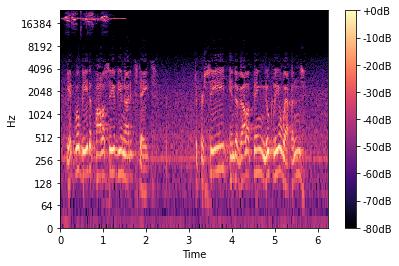

Suspicious ultrasonic freq. detected in $./Ex3_sound4.wav
./Ex3_sound4.wav is suspiciuos


In [90]:
audio_files = ["./Ex3_sound1.wav", "./Ex3_sound2.wav", "./Ex3_sound3.wav", "./Ex3_sound4.wav"]
for file in audio_files:
    is_suspicious, S, sr = analyze_sound(file)
    if is_suspicious:
        print(f"{file} is suspiciuos")
        suspicious_sound = S
        suspicious_sr = sr

In [101]:
shifted_sound = shift_sound(suspicious_sound, suspicious_sr)
ipd.Audio(shifted_sound, rate=suspicious_sr)